泰坦尼克号乘客数据分析
- 项目背景  
通过对891名泰坦尼克乘客数据的探索，找出一些生还者具有的特征，或者那些因素与是否生还有关联等。  
    
- 数据描述  
变量名称及其含义：  
PassengerId 乘客ID  
Survival 是否生还（0 = 否, 1 = 是）  
Pclass 船票舱位(1 = 一等, 2 = 二等, 3 = 三等）  
Sex 性别	
Age 年纪		
Sibsp 在船上的兄弟姐妹或伴侣的人数	
Parch 在船上的父母或者孩子的人数 	
Ticket 船票号码	  
Fare  票价  
Cabin 船舱号码  
Embarked 登船港 （C = Cherbourg, Q = Queenstown, S = Southampton）

- 数据预处理  
1.导入数据处理模块，读取数据文件，并查看数据整体情况。Age有177条记录缺失，Cabin有687条记录缺失，Embarked有2条记录缺失。  
2.补充缺失值：  
a.由于条件限制，对Age的缺失值，采取用取均值±1个标准差的范围内的随机数进行补充的方式，通过前后对比Age的直方图，图形分布大致相同，补充值对数据无不良影响；  
b.对Embarked，根据频率，将两个记录补充为“S";c.由于Cabin缺失记录较多且值很多，无法进行有效补充和分析，可不做处理或删除该变量。  
3.删除'Name', 'Ticket', 'Cabin'等无关变量

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filename = 'c:/Users/shire/Downloads/udacity/project/titanic-data.csv'
titanic_df=pd.read_csv(filename)

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0,0.5,u'Count')

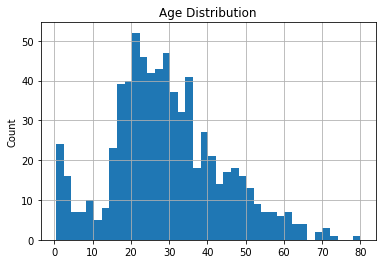

In [5]:
#查看年龄分布情况
age_plot=titanic_df['Age'].hist(bins=40)
age_plot.set_title('Age Distribution')
age_plot.set_ylabel('Count')

In [6]:
#查看人员登船港分布情况
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#补充缺失数据记录
random_age=np.random.randint(29.699118 - 14.526497,29.699118 + 14.526497,size=891-714)
titanic_df['Age'][np.isnan(titanic_df['Age'])] = random_age
titanic_df['Embarked'].fillna('S',inplace=True)

C:\Users\shire\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,u'Count')

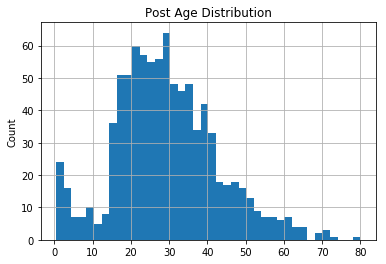

In [8]:
#查看数据补充后的年龄分布情况
age_plot=titanic_df['Age'].hist(bins=40)
age_plot.set_title('Post Age Distribution')
age_plot.set_ylabel('Count')

In [9]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

- 数据分析过程

Text(0.5,1,u'Total survival rate')

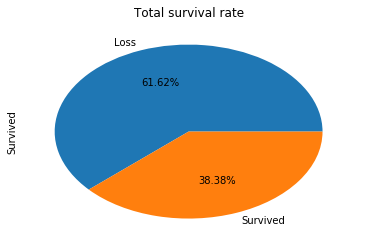

In [10]:
#建立数据生还率和遇难率的饼图函数
def pie_plot(data,title,label):
    pie_plot=data['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=label)
    return pie_plot.set_title(title)
#整体数据生还遇难比例饼图
pie_plot(titanic_df,'Total survival rate',['Loss','Survived'])

1.可视化整体生还率和遇难率，891名乘客中有38.38%的人生还了，61.62%的人遇难了。

(Text(0,0.5,u'Count'), Text(0.5,1,u'Survived/Loss Counts by Pclass'))

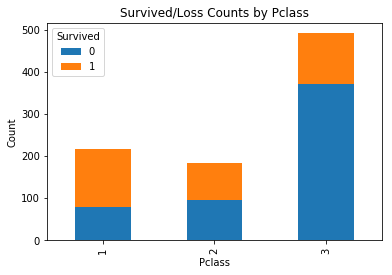

In [11]:
#建立根据key查看死亡遇难人数的柱状图函数
def by_variable(key):
    plot=titanic_df.groupby([key,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
    return plot.set_ylabel('Count'),plot.set_title('Survived/Loss Counts by ' +key)
#根据船票等级查看生还和遇难人数
by_variable('Pclass')

Text(0.5,1,u'Survival rate of Pclass3')

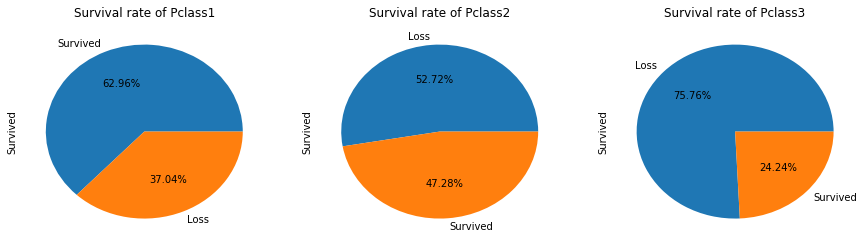

In [12]:
#根据船票等级进行分类，绘制生还遇难率饼图
pclass1=titanic_df[titanic_df['Pclass']==1]
pclass2=titanic_df[titanic_df['Pclass']==2]
pclass3=titanic_df[titanic_df['Pclass']==3]
plt.figure(figsize=(15,4))
 
plt.subplot(131)
pie_plot(pclass1,'Survival rate of Pclass1',['Survived','Loss'])
plt.subplot(132)  
pie_plot(pclass2,'Survival rate of Pclass2',['Loss','Survived'])
plt.subplot(133) 
pie_plot(pclass3,'Survival rate of Pclass3',['Loss','Survived'])

2.船票等级与生还率的关系  
a.查看生还和遇难人数发现，持一等船票的乘客中，生还人数高于遇难人数；持二等船票的乘客中，遇难人数略高于生还人数；持三等船票的乘客中，遇难人数远高于生还人数。  
b.对三类持票乘客生还遇难率可视化后发现，持一等船票的乘客中，生还率最高，为62.96%，远高于整体生还率38.38%；持二等船票的乘客中，生还率居中，为47.28%，高于整体生还率38.38%；持三等船票的乘客中，生还率最低，为24.24%，低于整体生还率38.38%。

(Text(0,0.5,u'Count'), Text(0.5,1,u'Survived/Loss Counts by Sex'))

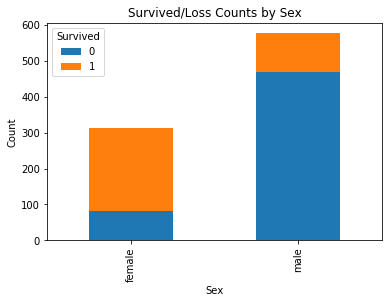

In [13]:
#根据性别查看生还和遇难人数
by_variable('Sex')

Text(0.5,1,u'Survival rate of male')

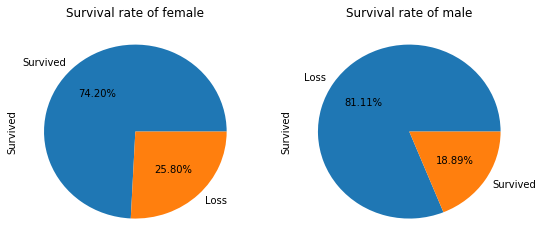

In [14]:
#根据性别进行分类，绘制生还遇难率饼图
female=titanic_df[titanic_df['Sex']=='female']
male=titanic_df[titanic_df['Sex']=='male']
plt.figure(figsize=(9,4))
 
plt.subplot(121)
pie_plot(female,'Survival rate of female',['Survived','Loss'])
plt.subplot(122)  
pie_plot(male,'Survival rate of male',['Loss','Survived'])

3.性别与生还率的关系  
a.根据性别查看生还和遇难人数发现，女性乘客中，生还人数高于遇难人数；男性乘客中，遇难人数远高于生还人数；且女性生还人数高于男性生还人数。  
b.对男女乘客生还遇难率可视化后发现，女性乘客的生还率为74.2%，高于整体生还率38.38%，且远高于男性乘客18.89%的生还率。

(Text(0,0.5,u'Count'), Text(0.5,1,u'Survived/Loss Counts by Embarked'))

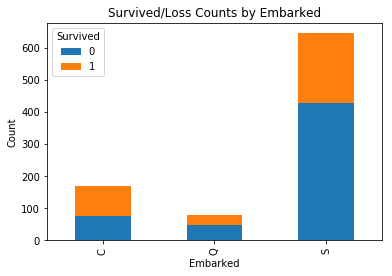

In [15]:
#根据登船港查看生还和遇难人数
by_variable('Embarked')

Text(0.5,1,u'Survival rate of Southampton')

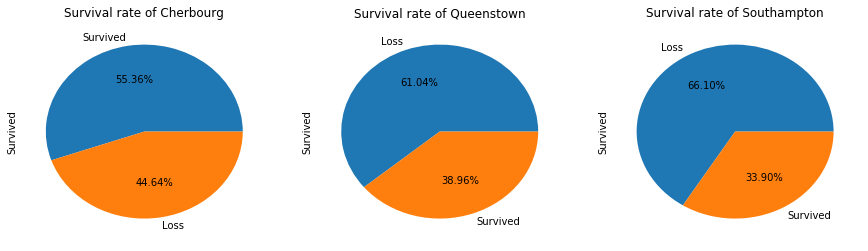

In [16]:
#根据登船港口进行分类，绘制生还遇难率饼图
Cherbourg=titanic_df[titanic_df['Embarked']=='C']
Queenstown=titanic_df[titanic_df['Embarked']=='Q']
Southampton=titanic_df[titanic_df['Embarked']=='S']
plt.figure(figsize=(15,4))

plt.subplot(131)
pie_plot(Cherbourg,'Survival rate of Cherbourg',['Survived','Loss'])
plt.subplot(132)  
pie_plot(Queenstown,'Survival rate of Queenstown',['Loss','Survived'])
plt.subplot(133) 
pie_plot(Southampton,'Survival rate of Southampton',['Loss','Survived'])

4.登船港口与生还率的关系  
a.从登船港口来看，由Cherbourg登船的乘客中，生还人数高于遇难人数；由Queenstown和Southampton登船的乘客中，遇难人数均高于生还人数。  
b.由Cherbourg登船的乘客，生还率最高，为55.36%，由Queenstown和Southampton登船的乘客生还率分别为38.96%和33.7%。

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

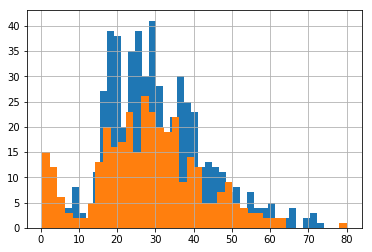

In [17]:
#根据是否生还进行分类，绘制年龄分布直方图
titanic_df.groupby('Survived')['Age'].hist(bins=40)

Age_group
children           0.593750
juveniles          0.400000
adults             0.367376
senior citizens    0.227273
Name: Survived, dtype: float64


Text(0,0.5,u'survival rate ')

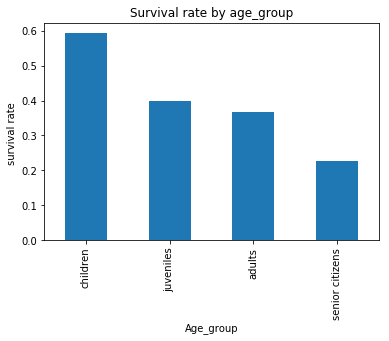

In [18]:
#按年龄段进行分组，并依据分组创建'Age_group'列
bins=[0,10,18,60,80]
titanic_df['Age_group']=pd.cut(titanic_df['Age'],bins, labels=['children', 'juveniles', 'adults','senior citizens'])
#对比不同Age_group的生还率
survival_rate_by_age = titanic_df.groupby('Age_group')['Survived'].mean()
print survival_rate_by_age
plot_by_age=survival_rate_by_age.plot(kind='bar')
plot_by_age.set_title('Survival rate by age_group')
plot_by_age.set_ylabel('survival rate ')

5.年龄与生还率的关系  
a.根据生还和遇难乘客的年龄分布图开看，生还和遇难乘客的年龄分布上存在较明显的不同，可做进一步探索。  
b.船上乘客的年龄范围为0.42~80岁，根据这个情况，将乘客按年龄段分为4组，分别是儿童children（0~10岁）, 青少年juveniles（10+~18岁）, 成年人adults（18+~60岁）,老年人senior citizens（60+~80岁），通过对这4组人员的生还率比较，儿童最高，为59.38%，青少年次之，为40%，成年人第三，为36.74%，老年人最低，仅有22.73%。 

- 结论    
1.在891名乘客中，有38.38%的人生还了，61.62%的人遇难了。  
2.持一等船票的乘客生还率高于持二等船票的乘客，而持二等船票的乘客又高于持三等船票的乘客。  
3.女性生还率远高于男性。  由Cherbourg登船的乘客，生还率最高  
4.由Cherbourg登船的乘客，生还率高于由Southampton和Queenstown登船的乘客。  
5.在儿童，青少年，成年人和老年人这4个年龄组中，生还率从高到低依次为儿童，青少年，成年人和老年人。  
6.存在的不足  
a.由于条件限制，对年龄缺失记录的补充采取方式较为简单，可能会对数据分析结果产生一些影响。  
b.由于对python可视化代了解不足，数据可视化呈现的效果不够美观。  
c.没有对其他变量，如Fare,SibSp等进行探索。  
希望在对数据分析理论及Python的使用有进一步认知以后可以对该项目进行进一步探索，改进以上不足。  


参考资料：  
1.https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html  
2.https://matplotlib.org/api/pyplot_api.html  
3.http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html  
4.http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
